In [3]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

# Loading the MNIST Data
### Total Training Samples = 60000
### Total Testing Samples = 10000

In [4]:
mnist = tf.keras.datasets.mnist

### Dividing into training and testing datasets

In [5]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(f"Total training samples: {len(x_train)}")
print(f"Total testing samples: {len(x_test)}")


(60000, 28, 28)
Total training samples: 60000
Total testing samples: 10000


### Overview of Data

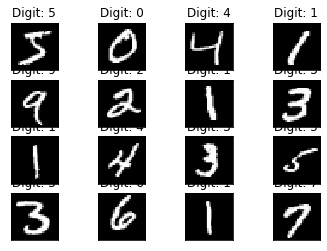

In [6]:
fig = plt.figure()
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.tight_layout
    plt.imshow(x_train[i], cmap='gray', interpolation = 'none')
    plt.title(f"Digit: {y_train[i]}")
    plt.xticks([])
    plt.yticks([])



Text(0.5, 1.0, 'Pixel Value Distribution')

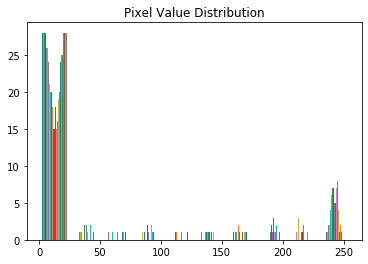

In [7]:
plt.hist(x_train[0])
plt.title("Pixel Value Distribution")

### Values of Pixels before Normalization 

In [8]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### Normalizing the data

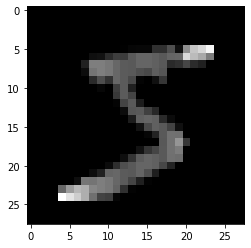

In [9]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[0],cmap = 'gray')

### Values of pixels after normalization

In [10]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### Resizing image for Convolutional layer

In [11]:
img_size = 28
x_trainr = np.array(x_train).reshape(-1, img_size, img_size, 1)
x_testr = np.array(x_test).reshape(-1, img_size, img_size, 1)
print('Training images dimensions', x_trainr.shape)
print('Testing images dimensions', x_testr.shape)
print(len(x_trainr))

Training images dimensions (60000, 28, 28, 1)
Testing images dimensions (10000, 28, 28, 1)
60000


## Creating Neural Network

In [12]:
model = Sequential()


### Convolutional Layer 1

In [13]:
model.add(Conv2D(64,(3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))

### Convolutional Layer 2

In [14]:
model.add(Conv2D(64,(3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))

### Convolutional Layer 3

In [15]:
model.add(Conv2D(64,(3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))

### Fully Connected Layer 1

In [16]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

### Fully Connected Layer 2

In [17]:
model.add(Dense(32))
model.add(Activation('relu'))

### Fully Connected Layer 3

In [18]:
model.add(Dense(16))
model.add(Activation('relu'))

### Last Fully Connected Layer 

In [19]:
model.add(Dense(10))
model.add(Activation('softmax'))

### Summary of model

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0

### Model Compilation : Loss, Optimization

In [21]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer ='adam', metrics=['accuracy'])

### Training the model

In [22]:
history = model.fit(x_trainr, y_train, epochs = 5, validation_data= (x_trainr, y_train))

Epoch 1/5
1875/1875 [==============================] - 80s 42ms/step - loss: 0.7865 - accuracy: 0.7330 - val_loss: 0.1654 - val_accuracy: 0.9679
Epoch 2/5
1875/1875 [==============================] - 79s 42ms/step - loss: 0.1400 - accuracy: 0.9581 - val_loss: 0.1136 - val_accuracy: 0.9758
Epoch 3/5
1875/1875 [==============================] - 82s 44ms/step - loss: 0.1026 - accuracy: 0.9680 - val_loss: 0.0929 - val_accuracy: 0.9804
Epoch 4/5
1875/1875 [==============================] - 91s 49ms/step - loss: 0.0780 - accuracy: 0.9762 - val_loss: 0.0715 - val_accuracy: 0.9856
Epoch 5/5
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0733 - accuracy: 0.9777 - val_loss: 0.0559 - val_accuracy: 0.9874


### Evaluation on test data

In [23]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test loss on 10000 test samples", test_loss)
print("Validation accuracy on 10000 test samples", test_acc)


313/313 [==============================] - 2s 6ms/step - loss: 0.0642 - accuracy: 0.9830
Test loss on 10000 test samples 0.06417105346918106
Validation accuracy on 10000 test samples 0.9829999804496765


Text(0.5, 1.0, 'Predicted Digit: 1')

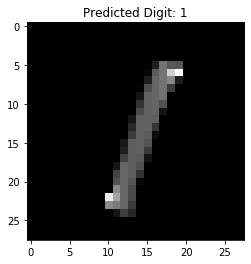

In [24]:
predictions = model.predict([x_testr])
plt.imshow(x_test[5], cmap='gray',interpolation = 'none')
plt.title(f"Predicted Digit: {np.argmax(predictions[5])}")

### Plotting the metricso

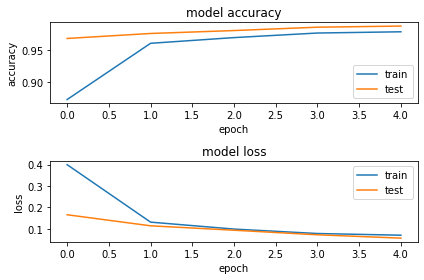

In [25]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()



In [26]:
mnist_model = load(keras_mnist.hs)
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

NameError: name 'load' is not defined

### Testing on Any Random image

Text(0.5, 1.0, 'Predicted Digit: 1')

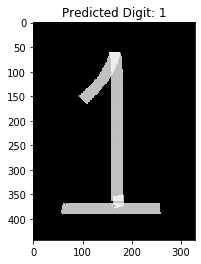

In [27]:
img = cv2.imread('Myone.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newimg = tf.keras.utils.normalize(resized, axis=1)
newimg = np.array(newimg).reshape(-1,img_size, img_size, 1)
Predict_img = model.predict(newimg)
plt.imshow(img)
plt.title(f"Predicted Digit: {np.argmax(Predict_img)}")

In [33]:
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
cap = cv2.VideoCapture("Live_Handwritten_Digits.mp4")
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot Open Video')

text = "Some text in the box"
(text_width, text_height) = cv2.getTextSize(text, font, fontScale = font_scale, thickness=1)[0]
text_offset_x = 10
text_offset_y = img.shape[0] - 25
box_coords = ((text_offset_x,text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))

cntr = 0;
while True:
    ret, frame = cap.read()
    cntr=cntr+1;
    if ((cntr%2)==0):
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
        newimg = tf.keras.utils.normalize(resized, axis=1)
        newimg = np.array(newimg).reshape(-1,img_size, img_size, 1)
        Predict_img = model.predict(newimg)
        status = np.argmax(Predict_img)
        print(status)
        print(type(status))
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,255,0),-1)
        cv2.putText(frame, status.astype(str), (x1 + int(w1/5),y1 + int(w1/5)), cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        
        cv2.imshow('Live Handwritten Digit Recognition', frame)
        
        if cv2.waitKey(2) & 0xFF == ord('q'):
            break
            
cap.release()


2
<class 'numpy.int64'>
2
<class 'numpy.int64'>
2
<class 'numpy.int64'>
2
<class 'numpy.int64'>
2
<class 'numpy.int64'>
2
<class 'numpy.int64'>
2
<class 'numpy.int64'>
2
<class 'numpy.int64'>
2
<class 'numpy.int64'>
3
<class 'numpy.int64'>
2
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
4
<class 'numpy.int64'>
4
<class 'numpy.int64'>
4
<class 'numpy.int64'>
4
<class 'numpy.int64'>
4
<class 'numpy.int64'>
4
<class 'numpy.int64'>
4
<class 'numpy.int64'>
4
<class 'numpy.int64'>
4
<class 'numpy.int64'>
4
<class 'numpy.int64'>
4
<class 'numpy.int64'>
4
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
2
<class 'numpy.int64'>
2
<class 'numpy.int64'>
2
<class 'numpy.int64'>
2
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-oduouqig\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
